In [2]:
import pandas as pd
import numpy as np

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_curve,
    roc_auc_score
)

from imblearn.over_sampling import SMOTE

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("../data/german_credit_data.csv")

df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [5]:
df["loan_status"] = df["Risk"].map({
    "good": 0,
    "bad": 1
})

df["loan_status"].value_counts()


loan_status
0    700
1    300
Name: count, dtype: int64

In [6]:
df = df.drop(columns=["Risk"])


In [7]:
df_encoded = pd.get_dummies(df, drop_first=True)

df_encoded.head()

,Unnamed: 0,Age,Job,Credit amount,Duration,loan_status,Sex_male,Housing_own,Housing_rent,Saving accounts_moderate,...,Saving accounts_rich,Checking account_moderate,Checking account_rich,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,0,67,2,1169,6,0,True,True,False,False,...,False,False,False,False,False,False,False,True,False,False
1,1,22,2,5951,48,1,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False
2,2,49,1,2096,12,0,True,True,False,False,...,False,False,False,False,False,True,False,False,False,False
3,3,45,2,7882,42,0,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,4,53,2,4870,24,1,True,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [8]:
X = df_encoded.drop("loan_status", axis=1)
y = df_encoded["loan_status"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [10]:
smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(
    X_train,
    y_train
)

print("Before SMOTE:")
print(y_train.value_counts())

print("\nAfter SMOTE:")
print(y_train_smote.value_counts())

Before SMOTE:
loan_status
0    560
1    240
Name: count, dtype: int64

After SMOTE:
loan_status
1    560
0    560
Name: count, dtype: int64


In [11]:
model = LogisticRegression(max_iter=1000)

model.fit(X_train_smote, y_train_smote)

c:\Users\Towhidul Alam\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [12]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

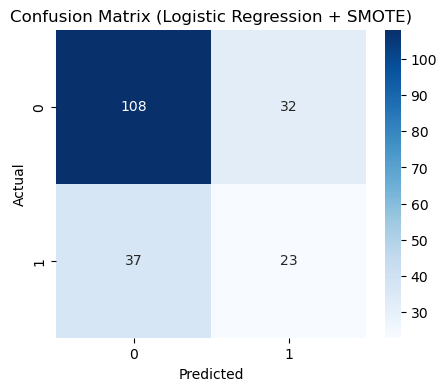

In [13]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Logistic Regression + SMOTE)")
plt.show()

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.77      0.76       140
           1       0.42      0.38      0.40        60

    accuracy                           0.66       200
   macro avg       0.58      0.58      0.58       200
weighted avg       0.65      0.66      0.65       200



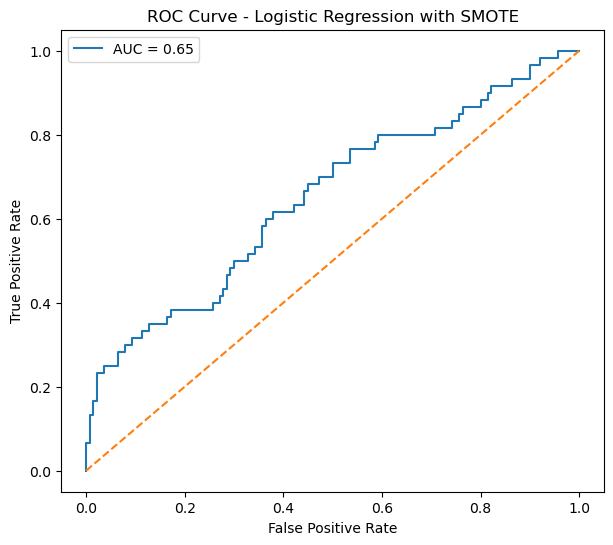

np.float64(0.6509523809523811)

In [15]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression with SMOTE")
plt.legend()
plt.show()

auc_score